# NOAA GFS on AWS

 * [OpenData Registry](https://registry.opendata.aws/noaa-gfs-pds/)
 * [Browse datafiles](http://awsopendata.s3-website-us-west-2.amazonaws.com/noaa-gfs/#)

In [1]:
# imports and setup

from matplotlib import pyplot
from podpac.coordinates import Coordinates, clinspace, crange
from podpac.datalib.gfs import GFSSource, GFS, GFSLatest

import datetime
now = datetime.datetime.now()
yesterday = now - datetime.timedelta(1)
tomorrow = now + datetime.timedelta(1)

# The data files are removed after a few weeks. Normally that won't matter
# because you would probably use GFSLatest. In order to demo GFSSource and GFS,
# let's use yesterday 12:00 as the base date.
date = yesterday.strftime('%Y%m%d')
hour = '1200'

## GFSSource

Load and plot a forecast for a particular parameter and level. This node loads data from one S3 file given a parameter, level, base date, and forecast time.

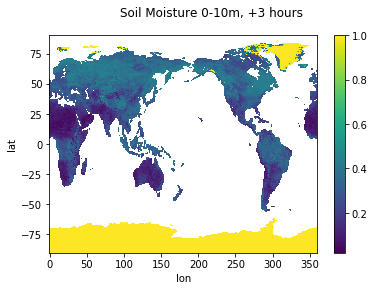

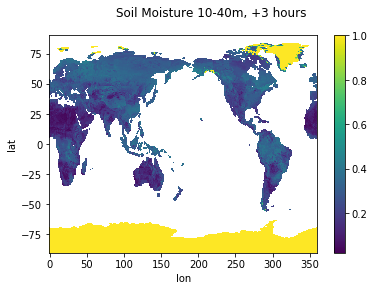

In [2]:
# SOIM forecast from 2018-12-06 12:00 for +3 hours (2018-12-06 15:00)
gfs_soim = GFSSource(parameter='SOIM', level='0-10 m DPTH', date=date, hour=hour, forecast='003')
o = gfs_soim.eval(gfs_soim.native_coordinates)
pyplot.figure(); pyplot.suptitle('Soil Moisture 0-10m, +3 hours')
o.plot()

# SOIM forecast from 2018-12-06 12:00 for +3 hours (2018-12-06 15:00)
gfs_soim = GFSSource(parameter='SOIM', level='10-40 m DPTH', date=date, hour=hour, forecast='384')
o = gfs_soim.eval(gfs_soim.native_coordinates)
pyplot.figure(); pyplot.suptitle('Soil Moisture 10-40m, +3 hours')
o.plot()

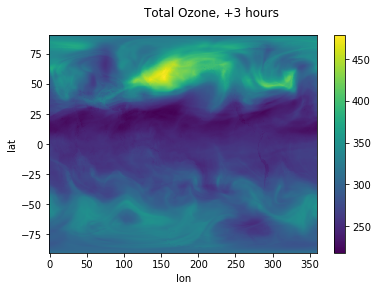

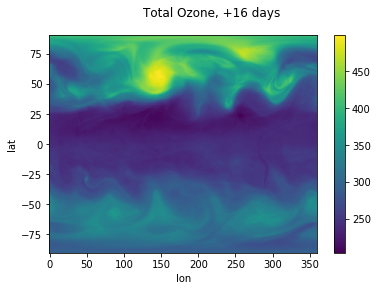

In [3]:
# TOZO forecast from 2018-12-06 12:00 for +3 hours (2018-12-22 15:00)
gfs_tozo = GFSSource(parameter='TOZO', level='0 - NONE', date=date, hour=hour, forecast='003')
o = gfs_tozo.eval(gfs_tozo.native_coordinates)
pyplot.figure(); pyplot.suptitle('Total Ozone, +3 hours')
o.plot()

# TOZO forecast from 2018-12-06 12:00 for +384 hours (2018-12-22 12:00)
gfs_tozo= GFSSource(parameter='TOZO', level='0 - NONE', date=date, hour=hour, forecast='384')
o = gfs_tozo.eval(gfs_tozo.native_coordinates)
pyplot.figure(); pyplot.suptitle('Total Ozone, +16 days')
o.plot()

## GFS

The `GFS` node aggregates the `GFSSource` forecast nodes given a parameter, level, and base date. It interpolates forecast time, so you can get data for any time in the forecast range.

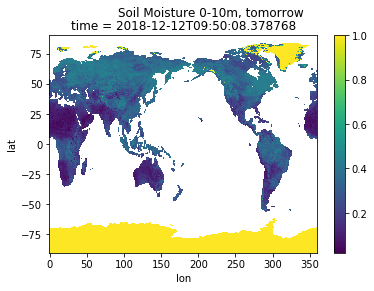

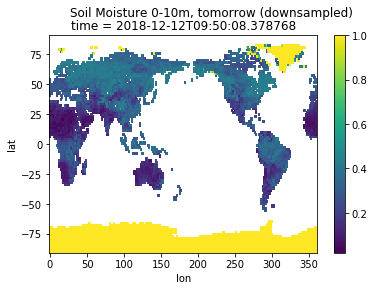

In [4]:
# we'll re-use the same node with different coordinates in the following examples
gfs_soim = GFS(parameter='SOIM', level='0-10 m DPTH', date=date, hour=hour)

# get the global forecast for this time tomorrow at full resolution
c = Coordinates(
    [gfs_soim.native_coordinates['lat'], gfs_soim.native_coordinates['lon'], tomorrow],
    dims=['lat', 'lon', 'time'])

o = gfs_soim.eval(c)
pyplot.figure(); pyplot.suptitle('Soil Moisture 0-10m, tomorrow')
o.plot()

# get the regional forecast for this time tomorrow over at downsampled resolution
c = Coordinates([
    clinspace(-90,  90, 100), clinspace(0, 360, 200), tomorrow],
    dims=['lat', 'lon', 'time'])

o = gfs_soim.eval(c)
pyplot.figure(); pyplot.suptitle('Soil Moisture 0-10m, tomorrow (downsampled)')
o.plot()

### Time-series

The `GFS` node can also be used to plot the forecast for a particular location over time.

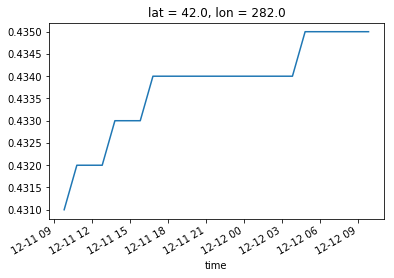

In [5]:
# this is the same node as above
gfs_soim = GFS(parameter='SOIM', level='0-10 m DPTH', date=date, hour=hour)

# get the forecast at lat=42, lon=275 every hour for the next 24 hours
start = now
stop = now + datetime.timedelta(hours=24)
c = Coordinates([42, 282, crange(start, stop, '1,h')], dims=['lat', 'lon', 'time'])
o = gfs_soim.eval(c)
o.plot()

## GFSLatest

Convenience wrapper to get the most recently available `GFS` node. Just supply the parameter and level, and evaluate at any time up to 16 days from now.

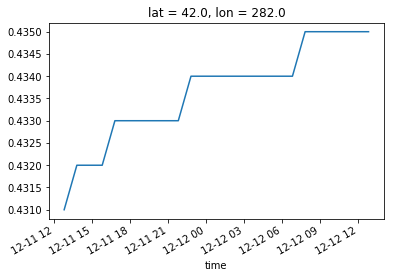

In [6]:
# get the latest forecast at lat=42, lon=275 at 1 hour resolution

gfs_soim = GFSLatest(parameter='SOIM', level='0-10 m DPTH')
start = now + datetime.timedelta(hours=3)
stop = now + datetime.timedelta(hours=27)
c = Coordinates([42, 282, crange(start, stop, '1,h')], dims=['lat', 'lon', 'time'])

o = gfs_soim.eval(c)
o.plot()